## Task 1

In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
stroke=pd.read_csv("Stroke.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [131]:
# Drop the id column
stroke.drop('id', axis=1, inplace=True)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [132]:
# Check for N/A in columns
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [133]:
# Preprocessing bmi column
# As there are N/A in this column, we will assign mean of the column, as what we did in previous homework. 
stroke.replace("NaN", np.nan, inplace=True)
if stroke.bmi.isnull().any():
    stroke.bmi.fillna(stroke.bmi.mean(), inplace=True)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [134]:
# Now there is no more N/A in bmi column
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [135]:
# Preprocessing categorical cloumns
# Integer coding
# 'gender', 'ever_married', 'Residence_type': These are binary categorical variables. We can use integer coding since there are only two categories.
label_encoder = LabelEncoder()
stroke['gender'] = label_encoder.fit_transform(stroke['gender'])
stroke['ever_married'] = label_encoder.fit_transform(stroke['ever_married'])
stroke['Residence_type'] = label_encoder.fit_transform(stroke['Residence_type'])

# One-hot encoding
# 'work_type', 'smoking_status': These are non-binary categorical variables with no ordinal relationship, so we'll use one-hot encoding.
stroke = pd.get_dummies(stroke, columns=['work_type', 'smoking_status'], drop_first=True)

<function matplotlib.pyplot.show(close=None, block=None)>

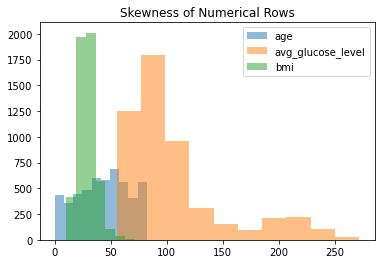

In [137]:
# Check whether numberical data is skewed
plt.hist(stroke.age,alpha=0.5, label="age")

plt.hist(stroke.avg_glucose_level,alpha=0.5, label="avg_glucose_level")

plt.hist(stroke.bmi,alpha=0.5, label="bmi")
plt.title("Skewness of Numerical Rows")
plt.legend()
plt.show

As we can see on the histogram plot, the distributions of 'age', 'avg_glucose_level', and 'bmi' have different ranges and are skewed. Since we are going to apply Logistic Regression, Support Vector Machine, and Random Forest, standard scaler is more suitable. To be specific, Logistic Regression assume that the independent variables follow a Gaussian distribution; Support Vector Machine are very sensitive to the scale of the input features, and the performance can change significantly with unscaled data; and Random Forest is not sensitive to the scale of the features.

In [122]:
# Rescale data
# 'age', 'avg_glucose_level', 'bmi': These are continuous variables. Given that machine learning algorithms perform better when numerical input variables are on a similar scale, we'll use MinMaxScaler to rescale these features.
scaler = StandardScaler()
stroke[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke[['age', 'avg_glucose_level', 'bmi']])
stroke

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051434,0,1,1,1,2.706375,1.001234e+00,1,0,1,0,0,1,0,0
1,0,0.786070,0,0,1,0,2.121559,1.384666e-15,1,0,0,1,0,0,1,0
2,1,1.626390,0,1,1,0,-0.005028,4.685773e-01,1,0,1,0,0,0,1,0
3,0,0.255342,0,0,1,1,1.437358,7.154182e-01,1,0,1,0,0,0,0,1
4,0,1.582163,1,0,1,0,1.501184,-6.357112e-01,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,1,0,1,1,-0.494658,1.384666e-15,0,0,1,0,0,0,1,0
5106,0,1.670617,0,0,1,1,0.420775,1.442949e+00,0,0,0,1,0,0,1,0
5107,0,-0.363842,0,0,1,0,-0.511443,2.217363e-01,0,0,0,1,0,0,1,0
5108,1,0.343796,0,0,1,0,1.328257,-4.278451e-01,0,0,1,0,0,1,0,0


'hypertension', 'heart_disease', 'stroke': These are already in a binary format (0 or 1), so no further preprocessing is needed.

In [123]:
# Split the dataset into training and test sets (90% train, 10% test)
X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [124]:
# Dictionary to store the best models
best_models = {}

# Logistic Regression model selection
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                  'max_iter': [1000],
                  'solver': ['lbfgs', 'sag', 'saga']}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
best_models['Logistic Regression'] = log_reg_grid.best_estimator_

# Support Vector Machine model selection
svm_params = {'C': [0.1, 1, 10, 100], 
              'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],  
              'kernel': ['rbf', 'poly', 'sigmoid'],  
              'degree': [2, 3, 4]}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_models['SVM'] = svm_grid.best_estimator_

# Random Forest model selection using out-of-bag error
rf_params = {'n_estimators': [100, 200, 300, 400, 500], 
             'max_features': ['auto', 'sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(oob_score=True), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_models['Random Forest'] = rf_grid.best_estimator_

# Now compare the performance of the best models on the test set
test_scores = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    test_scores[model_name] = accuracy_score(y_test, y_pred)

# Find the best model based on test accuracy
best_model_name = max(test_scores, key=test_scores.get)
best_model = best_models[best_model_name]

print(test_scores)
print(f"The best model is {best_model_name} with a test accuracy of {test_scores[best_model_name]:.4f}")

{'Logistic Regression': 0.8414872798434442, 'SVM': 0.8493150684931506, 'Random Forest': 0.8317025440313112}
The best model is SVM with a test accuracy of 0.8493


In [139]:
best_param={'Logistic Regression':log_reg_grid.best_params_, 'SVM':svm_grid.best_params_, 'Random Forest': rf_grid.best_params_}
best_param

{'Logistic Regression': {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'},
 'SVM': {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'},
 'Random Forest': {'max_features': 'log2', 'n_estimators': 400}}

In [142]:
test_error={'Logistic Regression':1-test_scores['Logistic Regression'], 'SVM':1-test_scores['SVM'], 'Random Forest': 1-test_scores['Random Forest']}
test_error

{'Logistic Regression': 0.15851272015655582,
 'SVM': 0.15068493150684936,
 'Random Forest': 0.16829745596868884}